# 1. Import Neccessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import sys
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [4]:
sys.setrecursionlimit(100000)
print("Current recursion limit:", sys.getrecursionlimit())

Current recursion limit: 100000


# 2. Load Data

In [5]:
data = pd.read_csv('/kaggle/input/tl-data/tl-data-09-2023.csv')

## This dataset includes data on all ranked TETR.IO players as of September 1, 2023. The data on each player includes:

    ID
    Username
    Games Played
    Games Won
    TR (User's Tetra Rating)
    Glicko (User's Glicko-2 rating)
    RD (User's rating deviation)
    TETRA LEAGUE rank
    Highest ever TETRA LEAGUE rank
    APM (User's average attack per minute over the last 10 games)
    PPS (User's average pieces per second over the last 10 games)
    VS (User's average versus score over the last 10 games)
    Verified (Whether they are verified or not)
    Country
    40 LINES personal best
    BLITZ personal best


In [6]:
data.head()

,id,username,gamesplayed,gameswon,tr,glicko,rd,rank,bestrank,apm,pps,vs,verified,country,40l_sprint,blitz
0,5e844b0868270e617d52c990,czsmall0402,442,417,24999.398155,4310.378695,89.356040,x,x,189.12,3.21,378.93,True,NaN,18.39,828316.0
1,5e697bbf77aba60f95fb38da,firestorm,3690,2894,24999.116980,4193.225768,73.232078,x,x,183.79,3.40,364.77,True,KR,17.99,1363531.0
2,615fb20fe17beeef45104302,blaarg,2148,1821,24999.103938,4188.196199,71.459517,x,x,185.91,3.70,363.16,True,US,15.31,NaN
3,5f5dbcc4454e942b4fdfc5fa,vincehd,1331,881,24998.696817,4089.441888,70.983747,x,x,182.41,3.54,375.53,True,PH,15.30,1145320.0
4,5e88d0ead351fa71316ba29e,promooooooo,4031,2576,24998.586047,4067.895810,70.828891,x,x,176.67,3.49,342.16,True,AQ,15.75,1101993.0


In [7]:
data.columns

Index(['id', 'username', 'gamesplayed', 'gameswon', 'tr', 'glicko', 'rd',
       'rank', 'bestrank', 'apm', 'pps', 'vs', 'verified', 'country',
       '40l_sprint', 'blitz'],
      dtype='object')

## 2.1 Set Feature and Shuffle Data

In [8]:
target_feature = 'tr'

In [24]:
shuffled_data = data[target_feature].sample(frac=1, random_state=42)
shuffled_data

19892    13204.216694
898      24367.448698
41511     1688.614848
6431     20868.754888
15170    15922.048848
             ...     
11284    18100.974451
44732      477.007978
38158     3110.150485
860      24392.046391
15795    15556.168972
Name: tr, Length: 45197, dtype: float64

# 3. Define Algorithm

In [25]:
def insertion_sort(arr):
    n = len(arr)
    
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [26]:
def insertion_sort_recursive(arr, n):
    # base case
    if n <= 1:
        return
    
    # recursive case
    insertion_sort_recursive(arr, n - 1)
    
    key = arr[n - 1]
    i = n - 2

    while i >= 0 and arr[i] > key:
        arr[i + 1] = arr[i]
        i -= 1
    
    arr[i + 1] = key

# 4. Calculate Time

In [35]:
jumlah_data = [10, 20, 50, 100, 200, 500, 1000, 1500, 2000, 2500, 5000, 10000]
#jumlah_data = np.linspace(10, 10000, 20, dtype=np.uint16)

times_insertion_sort = []
times_insertion_sort_recursive = []

for n in tqdm(jumlah_data, desc='Sorting...'):
    # menghitung waktu untuk skema iteratif
    start_time = time.time()  
    insertion_sort(np.array(shuffled_data[:n]))  
    end_time = time.time() 
    times_insertion_sort.append(end_time - start_time) 

    # menghitung waktu untuk skema rekursif
    start_time = time.time()  
    insertion_sort_recursive(np.array(shuffled_data[:n]), n)  
    end_time = time.time()  
    times_insertion_sort_recursive.append(end_time - start_time) 

Sorting...: 100%|██████████| 12/12 [00:28<00:00,  2.37s/it]


# 5. Save the Results as a DataFrame

In [36]:
times_df = pd.DataFrame({
    'n' : jumlah_data,
    'insertion sort iterative' : times_insertion_sort,
    'insertion sort recursive' : times_insertion_sort_recursive
})

In [37]:
times_df

,n,insertion sort iterative,insertion sort recursive
0,10,0.000293,0.000081
1,20,0.000099,0.000122
2,50,0.000306,0.000309
3,100,0.001045,0.001221
4,200,0.004922,0.005279
5,500,0.027684,0.025292
6,1000,0.100165,0.100765
7,1500,0.234667,0.231829
8,2000,0.408562,0.401855
9,2500,0.705821,0.625339


# 6. Plot the Results

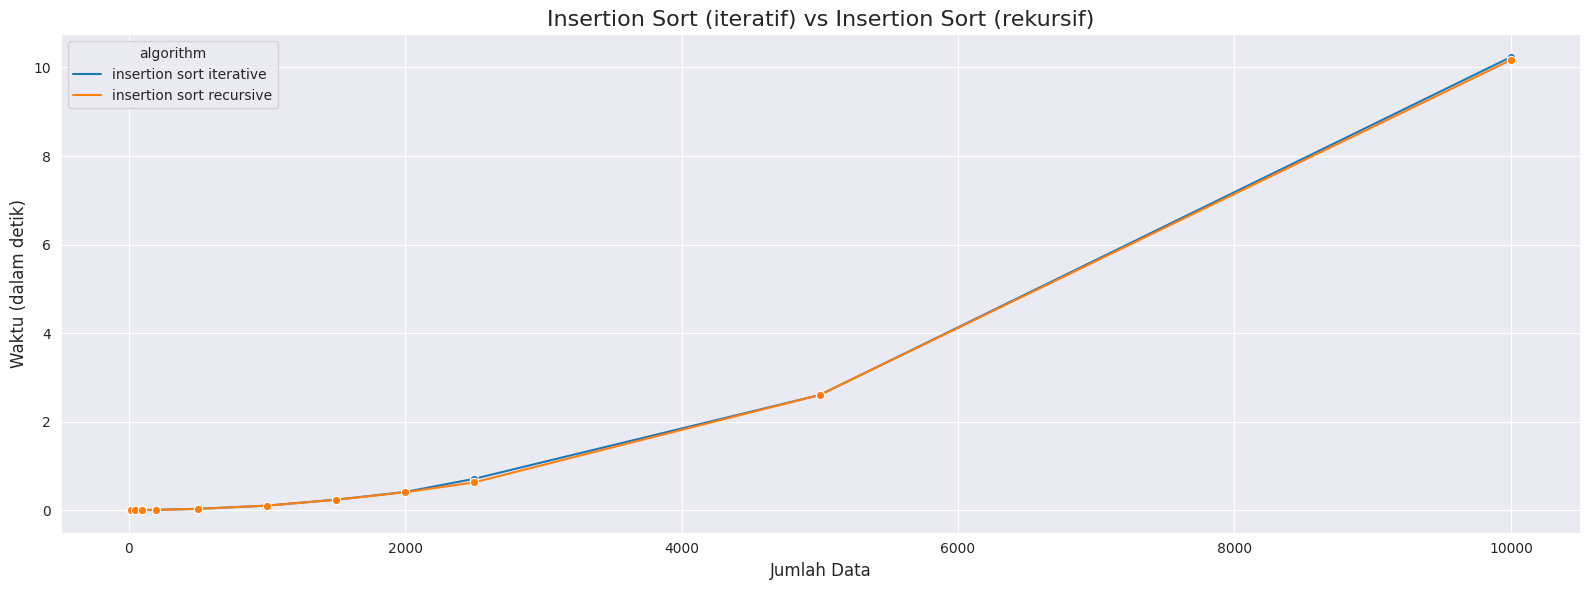

In [39]:
times_all = pd.melt(times_df, id_vars='n', var_name='algorithm', value_name='time taken')


plt.figure(figsize=(16, 6))
sns.lineplot(times_all, x='n', y='time taken', hue='algorithm', marker='o')
plt.title('Insertion Sort (iteratif) vs Insertion Sort (rekursif)', fontsize=16)
plt.xlabel('Jumlah Data', fontsize=12)
plt.ylabel("Waktu (dalam detik)", fontsize=12)

plt.tight_layout()
plt.show()